In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
labelencoder = LabelEncoder()

In [2]:
df_churn = pd.read_csv('ECenter Dataset.csv')
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,StreamingTV,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,"EarlierSubsciberOfOtherProviders (1823,5220)","NumOfComplaintsSince2020 (1823,5220)",Renewed pack,Reduced no. of channels,Sentiment Score,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,DSL,No,Yes,No,...,Yes,Electronic check,29.85,29.85,No,4.0,Yes,Yes,0.7717,No
1,5575-GNVDE,Male,0.0,No,No,34.0,DSL,Yes,No,No,...,No,Mailed check,56.95,1889.50,Yes,4.0,Yes,Yes,-0.5423,No
2,3668-QPYBK,Male,0.0,No,No,2.0,DSL,Yes,Yes,No,...,Yes,Mailed check,53.85,108.15,No,6.0,Yes,Yes,0.4404,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,DSL,Yes,No,No,...,No,Bank transfer (automatic),42.30,1840.75,No,6.0,Yes,Yes,0.5267,No
4,9237-HQITU,Female,0.0,No,No,2.0,Fiber optic,No,No,No,...,Yes,Electronic check,70.70,151.65,No,2.0,Yes,Yes,0.6369,Yes


In [3]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7045 entries, 0 to 7044
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   customerID                                    7043 non-null   object 
 1   gender                                        7043 non-null   object 
 2   SeniorCitizen                                 7043 non-null   float64
 3   Partner                                       7043 non-null   object 
 4   Dependents                                    7043 non-null   object 
 5   tenure                                        7043 non-null   float64
 6   InternetService                               7043 non-null   object 
 7   OnlineSecurity                                7043 non-null   object 
 8   OnlineBackup                                  7043 non-null   object 
 9   StreamingTV                                   7043 non-null   o

In [4]:
#  Convert non-numerical labels to numerical labels for churn variable.
df_churn.Churn = labelencoder.fit_transform(df_churn.Churn)
df_churn.Churn.value_counts()

0    5174
1    1869
2       2
Name: Churn, dtype: int64

In [5]:
df_churn.drop(df_churn.index[df_churn['Churn'] == 2], inplace = True)

In [6]:
df_churn.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [7]:
df_churn = df_churn.rename({'NumOfComplaintsSince2020 (1823,5220)': 'Complaints', 'EarlierSubsciberOfOtherProviders (1823,5220)': 'EarSub' , 'Reduced no. of channels' : 'ReducedChan', 'Sentiment Score' : 'Sentiment','Renewed pack' : 'Renewedpack'}, axis=1) 

In [8]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,StreamingTV,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,EarSub,Complaints,Renewedpack,ReducedChan,Sentiment,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,DSL,No,Yes,No,...,Yes,Electronic check,29.85,29.85,No,4.0,Yes,Yes,0.7717,0
1,5575-GNVDE,Male,0.0,No,No,34.0,DSL,Yes,No,No,...,No,Mailed check,56.95,1889.50,Yes,4.0,Yes,Yes,-0.5423,0
2,3668-QPYBK,Male,0.0,No,No,2.0,DSL,Yes,Yes,No,...,Yes,Mailed check,53.85,108.15,No,6.0,Yes,Yes,0.4404,1
3,7795-CFOCW,Male,0.0,No,No,45.0,DSL,Yes,No,No,...,No,Bank transfer (automatic),42.30,1840.75,No,6.0,Yes,Yes,0.5267,0
4,9237-HQITU,Female,0.0,No,No,2.0,Fiber optic,No,No,No,...,Yes,Electronic check,70.70,151.65,No,2.0,Yes,Yes,0.6369,1


In [9]:
#Converting Objects datatype to Numeric form.
df_churn.replace(np.nan,0)
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')
df_churn['SeniorCitizen'] = pd.to_numeric(df_churn['SeniorCitizen'], errors='coerce')
df_churn['tenure'] = pd.to_numeric(df_churn['tenure'], errors='coerce')
df_churn['MonthlyCharges'] = pd.to_numeric(df_churn['MonthlyCharges'], errors='coerce')
df_churn['Complaints'] = pd.to_numeric(df_churn['Complaints'], errors='coerce')

In [10]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,StreamingTV,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,EarSub,Complaints,Renewedpack,ReducedChan,Sentiment,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,DSL,No,Yes,No,...,Yes,Electronic check,29.85,29.85,No,4.0,Yes,Yes,0.7717,0
1,5575-GNVDE,Male,0.0,No,No,34.0,DSL,Yes,No,No,...,No,Mailed check,56.95,1889.50,Yes,4.0,Yes,Yes,-0.5423,0
2,3668-QPYBK,Male,0.0,No,No,2.0,DSL,Yes,Yes,No,...,Yes,Mailed check,53.85,108.15,No,6.0,Yes,Yes,0.4404,1
3,7795-CFOCW,Male,0.0,No,No,45.0,DSL,Yes,No,No,...,No,Bank transfer (automatic),42.30,1840.75,No,6.0,Yes,Yes,0.5267,0
4,9237-HQITU,Female,0.0,No,No,2.0,Fiber optic,No,No,No,...,Yes,Electronic check,70.70,151.65,No,2.0,Yes,Yes,0.6369,1


In [11]:
#Converting float datatype to integer form.
df_churn = df_churn.fillna(0)
df_churn= df_churn.astype({"SeniorCitizen" : 'int',"tenure" : 'int',"MonthlyCharges" : 'int', "TotalCharges":'int',"Complaints" : 'int'})

In [12]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int32  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int32  
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   StreamingTV       7043 non-null   object 
 10  StreamingMovies   7043 non-null   object 
 11  PaperlessBilling  7043 non-null   object 
 12  PaymentMethod     7043 non-null   object 
 13  MonthlyCharges    7043 non-null   int32  
 14  TotalCharges      7043 non-null   int32  
 15  EarSub            7043 non-null   object 
 16  Complaints        7043 non-null   int32  


In [13]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,StreamingTV,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,EarSub,Complaints,Renewedpack,ReducedChan,Sentiment,Churn
0,7590-VHVEG,Female,0,Yes,No,1,DSL,No,Yes,No,...,Yes,Electronic check,29,29,No,4,Yes,Yes,0.7717,0
1,5575-GNVDE,Male,0,No,No,34,DSL,Yes,No,No,...,No,Mailed check,56,1889,Yes,4,Yes,Yes,-0.5423,0
2,3668-QPYBK,Male,0,No,No,2,DSL,Yes,Yes,No,...,Yes,Mailed check,53,108,No,6,Yes,Yes,0.4404,1
3,7795-CFOCW,Male,0,No,No,45,DSL,Yes,No,No,...,No,Bank transfer (automatic),42,1840,No,6,Yes,Yes,0.5267,0
4,9237-HQITU,Female,0,No,No,2,Fiber optic,No,No,No,...,Yes,Electronic check,70,151,No,2,Yes,Yes,0.6369,1


<ipython-input-14-258d3fc46890>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool) #To hid the upper grid of squares.


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'SeniorCitizen'),
  Text(1.5, 0, 'tenure'),
  Text(2.5, 0, 'MonthlyCharges'),
  Text(3.5, 0, 'TotalCharges'),
  Text(4.5, 0, 'Complaints'),
  Text(5.5, 0, 'Sentiment'),
  Text(6.5, 0, 'Churn')])

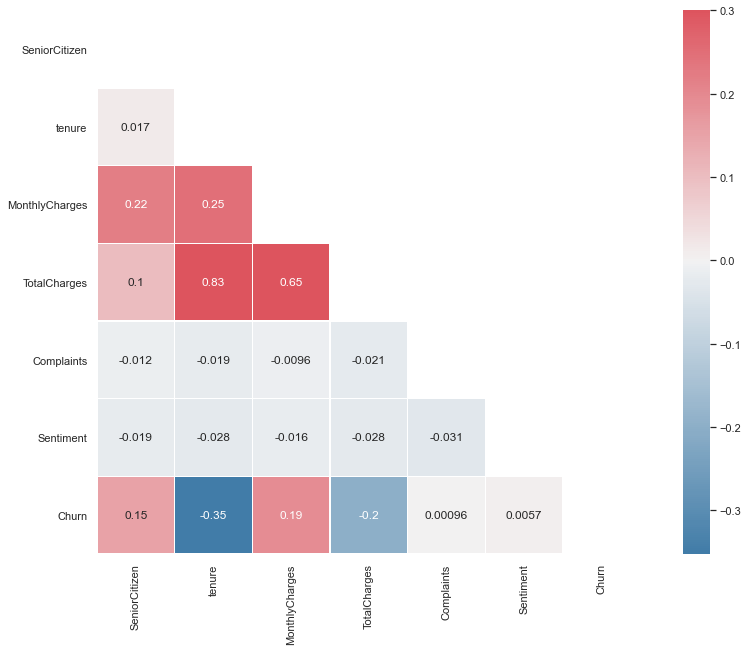

In [14]:
# Using correlation matrix to understand the correlation between numerical variables

df_corr = df_churn.corr()
sns.set(style="white")
mask = np.zeros_like(df_corr, dtype=np.bool) #To hid the upper grid of squares.
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, annot=True)

plt.yticks(rotation=0, ha="right")
plt.xticks(rotation=90, ha="center")

In [15]:
threshold = 0.80
corr_matrix = df_churn.corr().abs()
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Get colunm nubers and names with correlation above threshold value.
to_drop = [column for column in upper.columns if any(
    upper[column] >= threshold)]

<ipython-input-15-d44dd031101d>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [16]:
print(f'\n\nThere are {len(to_drop)} columns to drop with correlation > {threshold} --> {list(to_drop)}\n\n')



There are 1 columns to drop with correlation > 0.8 --> ['TotalCharges']




In [17]:
df_churn.shape

(7043, 21)

In [18]:
df_churn.drop('TotalCharges',axis='columns', inplace=True)

In [19]:
df_churn.shape

(7043, 20)

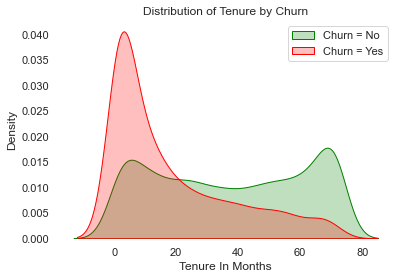

In [20]:
ax = sns.kdeplot(df_churn.tenure[(df_churn["Churn"] == 0) ],color="Green", shade = True)
ax = sns.kdeplot(df_churn.tenure[(df_churn["Churn"] == 1) ],ax =ax, color="Red", shade= True)
ax.legend(["Churn = No","Churn = Yes"], loc='upper right')

ax.set_ylabel('Density')
ax.set_xlabel('Tenure In Months')
ax.set_title('Distribution of Tenure by Churn')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)
sns.set(rc={'figure.figsize':(20,8)})

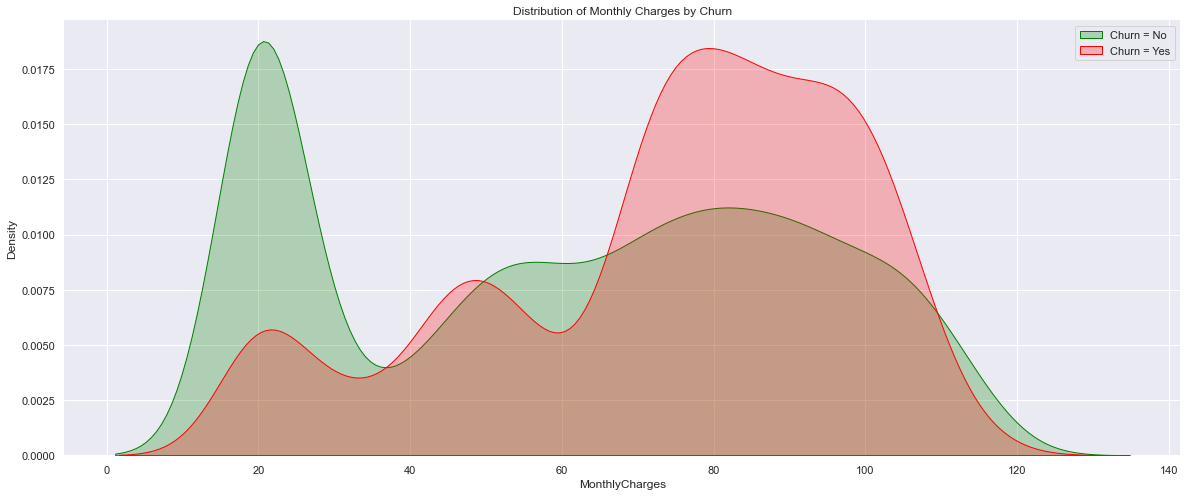

In [21]:
ax = sns.kdeplot(df_churn.MonthlyCharges[(df_churn["Churn"] == 0) ],color="Green", shade = True)
ax = sns.kdeplot(df_churn.MonthlyCharges[(df_churn["Churn"] == 1) ],ax =ax, color="Red", shade= True)
ax.legend(["Churn = No","Churn = Yes"], loc='upper right')

ax.set_ylabel('Density')
ax.set_xlabel('MonthlyCharges')
ax.set_title('Distribution of Monthly Charges by Churn')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)
sns.set(rc={'figure.figsize':(20,8)})

In [22]:
# ax = sns.kdeplot(df_churn.Sentiment[(df_churn["Churn"] == 0) ],color="Green", shade = True)
# ax = sns.kdeplot(df_churn.Sentiment[(df_churn["Churn"] == 1) ],ax =ax, color="Red", shade= True)
# ax.legend(["Churn = No","Churn = Yes"], loc='upper right')

# ax.set_ylabel('Density')
# ax.set_xlabel('Sentiment Score')
# ax.set_title('Distribution of Monthly Charges by Churn')

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_linewidth(False)
# ax.spines['left'].set_linewidth(False)
# sns.set(rc={'figure.figsize':(20,8)})

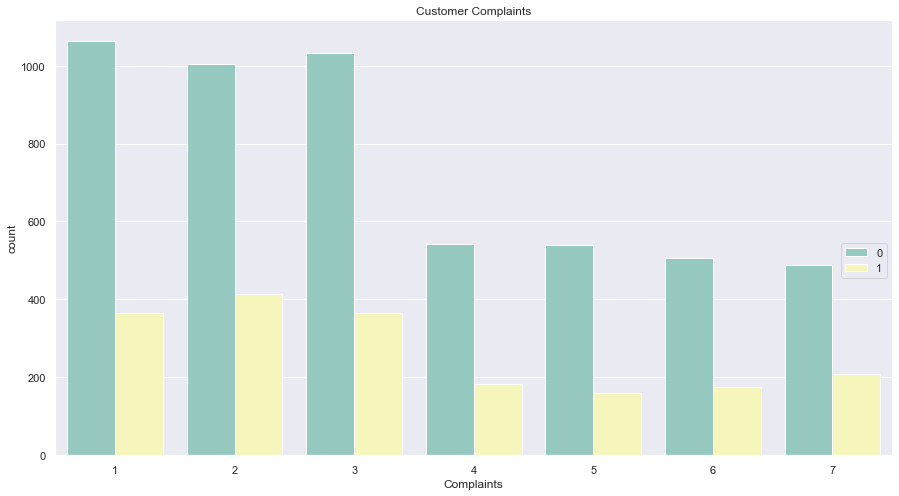

In [23]:
plt.figure(figsize=(15,8))
p=sns.countplot(x=df_churn["Complaints"], hue="Churn",data=df_churn,palette="Set3")
p.set_title('Customer Complaints')
p.legend(bbox_to_anchor=(1,0.5))

In [24]:
df_dummy = pd.get_dummies(df_churn, drop_first=True)
df_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,Complaints,Sentiment,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,...,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,EarSub_Yes,Renewedpack_Yes,Renewedpack_no,ReducedChan_Yes,ReducedChan_no
0,0,1,29,4,0.7717,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,0,34,56,4,-0.5423,0,0,0,0,0,...,0,0,0,0,1,1,1,0,1,0
2,0,2,53,6,0.4404,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,0,45,42,6,0.5267,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,2,70,2,0.6369,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0


In [25]:
df_churnmod=df_dummy
df_churnmod.head()


categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'InternetService', 'OnlineSecurity', 'OnlineBackup','StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'EarSub', 'Renewedpack', 'ReducedChan' ]

df_dummy = pd.get_dummies(df_churn, columns = categorical, drop_first= True)
df_dummy.head()

,customerID,tenure,MonthlyCharges,Complaints,Sentiment,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,...,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,EarSub_Yes,Renewedpack_Yes,Renewedpack_no,ReducedChan_Yes,ReducedChan_no
0,7590-VHVEG,1,29,4,0.7717,0,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
1,5575-GNVDE,34,56,4,-0.5423,0,1,0,0,0,...,0,0,0,0,1,1,1,0,1,0
2,3668-QPYBK,2,53,6,0.4404,1,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,7795-CFOCW,45,42,6,0.5267,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,9237-HQITU,2,70,2,0.6369,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0


Splitting into Training and Testing Data

In [26]:
y = df_churnmod['Churn']
X = df_churnmod.drop('Churn', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

Random Forest

In [27]:
rafr=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rafr.fit(X_train,y_train)
y_predrf=rafr.predict(X_test)

In [28]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predrf))

Accuracy: 0.7970191625266146


In [29]:
rf = RandomForestClassifier(n_estimators=100, max_depth=20,
                              random_state=42)
rf.fit(X_train, y_train) 
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.741
Test set accuracy:  0.736


In [30]:
y_predrf = rf.predict(X_test)
print(classification_report(y_test,y_predrf))
print(accuracy_score(y_test, y_predrf))
print(precision_score(y_test, y_predrf))
print(recall_score(y_test, y_predrf))
#Proportion of correct classifications, from overall number of cases.
#Proportion of correct positive classifications, from cases that are actually positive.
#Proportion of correct positive classifications, from cases that are predicted as positive.

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.67      0.01      0.01       373

    accuracy                           0.74      1409
   macro avg       0.70      0.50      0.43      1409
weighted avg       0.72      0.74      0.63      1409

0.7359829666430092
0.6666666666666666
0.005361930294906166


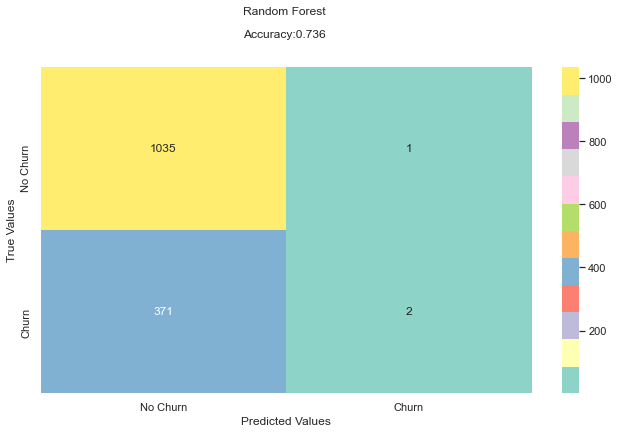

In [31]:
cm = confusion_matrix(y_test, y_predrf) 

cm_df = pd.DataFrame(cm,
                     index = ['No Churn','Churn'], 
                     columns = ['No Churn','Churn'])

plt.figure(figsize=(11,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Set3')
plt.title('Random Forest \n\nAccuracy:{0:.3f} \n \n'.format(accuracy_score(y_test, y_predrf)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix_rf = confusion_matrix(y_test,y_predrf)
confusion_matrix_rf

array([[1035,    1],
       [ 371,    2]], dtype=int64)

In [33]:
#Checking the accuracy score by only taking the fields with very high feature importance.
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': clf.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head(7)

,feature,importance
1,tenure,0.121113
2,MonthlyCharges,0.072313
4,Sentiment,0.057469
3,Complaints,0.043076
7062,PaymentMethod_Electronic check,0.030025
7050,InternetService_Fiber optic,0.029113
7053,OnlineSecurity_Yes,0.024896


In [35]:
y = df_churnmod['Churn']
X = df_churnmod[['tenure','MonthlyCharges','Sentiment','Complaints','InternetService_Fiber optic','PaymentMethod_Electronic check','OnlineSecurity_Yes']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [36]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7842441447835344


Linear Regression

In [38]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [39]:
y_predlr = logreg.predict(X_test)
print(classification_report(y_test,y_predlr))
print(accuracy_score(y_test, y_predlr))
print(precision_score(y_test, y_predlr))
print(recall_score(y_test, y_predlr))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.68      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

0.808374733853797
0.6845878136200717
0.5120643431635389


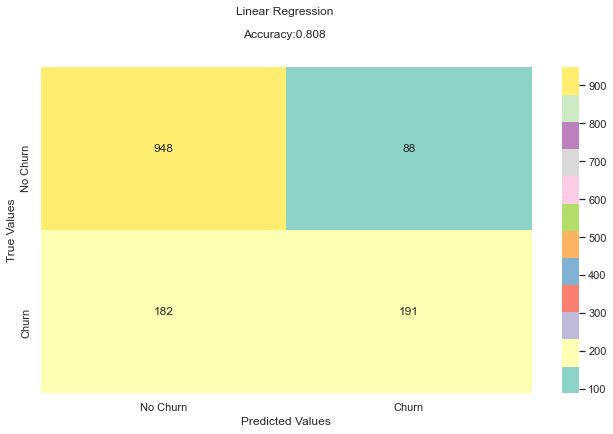

In [40]:
cm = confusion_matrix(y_test, y_predlr) 

cm_df = pd.DataFrame(cm,
                     index = ['No Churn','Churn'], 
                     columns = ['No Churn','Churn'])

plt.figure(figsize=(11,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Set3')
plt.title('Linear Regression \n\nAccuracy:{0:.3f} \n \n'.format(accuracy_score(y_test, y_predlr)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

XGBoost Model

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
xgb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
xgb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [42]:
clf.score(X_test, y_test)

0.7842441447835344

In [43]:
y_predxgb = xgb.predict(X_test)
print(classification_report(y_test,y_predxgb))
print(accuracy_score(y_test, y_predxgb))
print(precision_score(y_test, y_predxgb))
print(recall_score(y_test, y_predxgb))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

0.8055358410220014
0.6749116607773852
0.5120643431635389


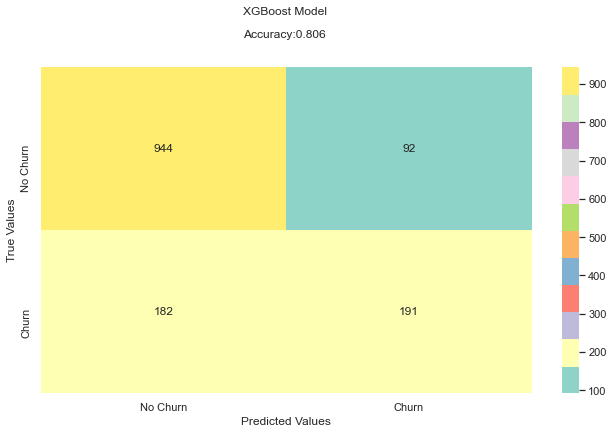

0.8055358410220014


In [44]:
cm = confusion_matrix(y_test, y_predxgb) 

cm_df = pd.DataFrame(cm,
                     index = ['No Churn','Churn'], 
                     columns = ['No Churn','Churn'])

plt.figure(figsize=(11,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Set3')
plt.title('XGBoost Model \n\nAccuracy:{0:.3f} \n \n'.format(accuracy_score(y_test, y_predxgb)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()
print(accuracy_score(y_test, y_predxgb))

k-Nearest Neighbors (KNN) Algorithm

In [45]:
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    #Get the accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Get the accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

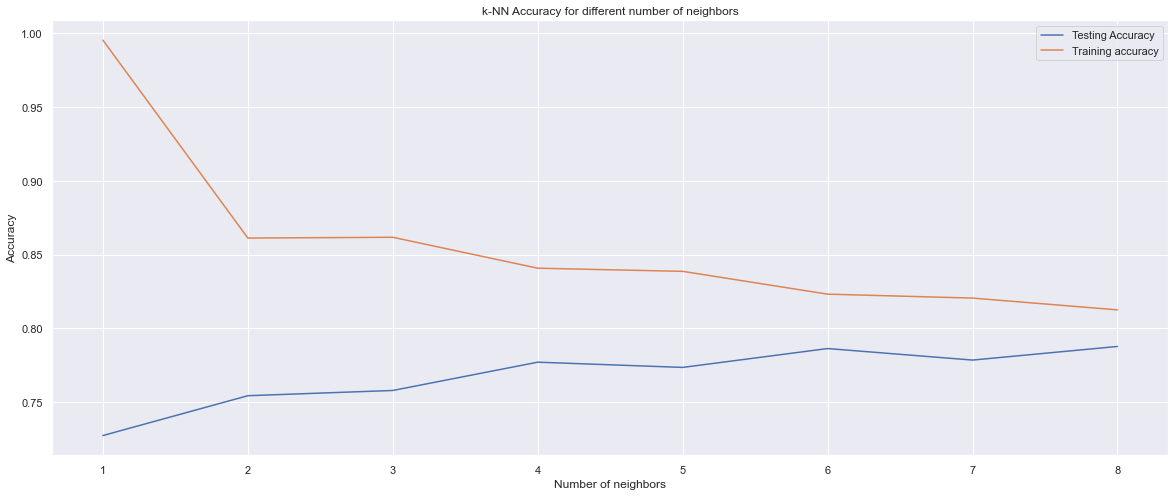

In [46]:
plt.title('k-NN Accuracy for different number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [47]:
#Setting the neighbor count to 8
from sklearn.neighbors import KNeighborsClassifier
KNN_Model=KNeighborsClassifier(n_neighbors=8).fit(X_train,y_train)

y_predknn=KNN_Model.predict(X_test)

In [48]:
def CONFUSION_MATRIX(model,test):
    cm=pd.crosstab(model,test)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    print()
    print()
    print('Accuracy -----------------------------------> ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('Specificity (True Negative Rate) -----------> ',round((TN*100)/(TN+FP),2))
    print()
    print('Sensivity (True Positive Rate) => Recall ---> ',round((TP*100)/(FN+TP),2))
    print()
    print('False Negative Rate ------------------------> ',round((FN*100)/(FN+TP),2))
    

In [49]:
CONFUSION_MATRIX(y_predknn,y_test)



Accuracy ----------------------------------->  78.78

Specificity (True Negative Rate) ----------->  81.1

Sensivity (True Positive Rate) => Recall --->  66.52

False Negative Rate ------------------------>  33.48


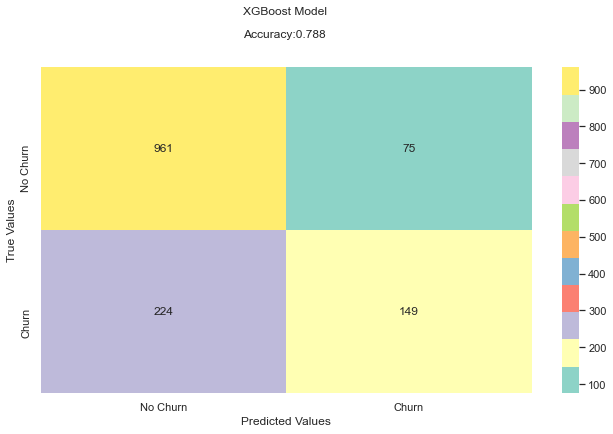

0.7877927608232789


In [50]:
cm = confusion_matrix(y_test, y_predknn) 

cm_df = pd.DataFrame(cm,
                     index = ['No Churn','Churn'], 
                     columns = ['No Churn','Churn'])

plt.figure(figsize=(11,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Set3')
plt.title('XGBoost Model \n\nAccuracy:{0:.3f} \n \n'.format(accuracy_score(y_test, y_predknn)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()
print(accuracy_score(y_test, y_predknn))

In [51]:

Comparison = { 'Model': ['Random Forest', 'Logistic Regression', 'XGBoost Model', 'K-Nearest Neighbors'],
              'Accuracy Score Percent' : [73,81,80,79]
              }
cmp=pd.DataFrame(data=Comparison)
cmp

,Model,Accuracy Score Percent
0,Random Forest,73
1,Logistic Regression,81
2,XGBoost Model,80
3,K-Nearest Neighbors,79


In [52]:
print(" \n The higly accurate algorithm is --> \n Logistic Regression Algorithm with accuracy score of => %s \n" % accuracy_score(y_test, y_predlr))

 
 The higly accurate algorithm is --> 
 Logistic Regression Algorithm with accuracy score of => 0.808374733853797 



In [53]:
y_pred_probs = logreg.predict_proba(X_test)
y_pred_probs = y_pred_probs [:, 1] #All rows of X_test column.
print(y_pred_probs)

[0.3843208  0.05199863 0.02991808 ... 0.1290004  0.01250295 0.27109275]


In [54]:
prob_scr = pd.concat([df_dummy, y_test], axis =1).dropna()
prob_scr['predictions'] = y_pred
prob_scr["Probability_score_of_churn(%)"] = y_pred_probs
prob_scr["Probability_score_of_churn(%)"] = prob_scr["Probability_score_of_churn(%)"]*100
prob_scr["Probability_score_of_churn(%)"]= prob_scr["Probability_score_of_churn(%)"].round(2)
prob_scr = prob_scr[['predictions', 'Probability_score_of_churn(%)']]
prob_scr ['Ranking'] = pd.qcut(prob_scr['Probability_score_of_churn(%)'].rank(method ='first'),10,labels=range(10,0,-1))
final = pd.concat([df_dummy, prob_scr], axis=1, ).dropna()
pop_col = final.pop('Churn')
final.insert(28, 'Churn', pop_col)
final_prob_scr = final.sort_values(by="Probability_score_of_churn(%)", ascending=False)

In [55]:
final_prob_scr.head()

,customerID,tenure,MonthlyCharges,Complaints,Sentiment,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,...,PaymentMethod_Mailed check,EarSub_Yes,Renewedpack_Yes,Renewedpack_no,ReducedChan_Yes,ReducedChan_no,Churn,predictions,Probability_score_of_churn(%),Ranking
5525,1333-PBMXB,54,24,1,0.6369,0,0,1,1,0,...,0,0,0,0,0,0,0,1.0,83.30,1
852,8713-IGZSO,2,24,5,0.0000,1,0,0,0,0,...,1,1,1,0,1,0,0,1.0,81.80,1
4689,2832-SCUCO,2,19,4,0.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,81.66,1
6638,4990-ALDGW,57,20,1,0.6369,1,0,0,0,0,...,1,1,1,0,1,0,0,1.0,81.11,1
5028,0254-FNMCI,72,109,1,0.7881,0,0,0,0,1,...,0,0,1,0,1,0,0,1.0,80.97,1


In [56]:
final_prob_scr.tail()

,customerID,tenure,MonthlyCharges,Complaints,Sentiment,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,...,PaymentMethod_Mailed check,EarSub_Yes,Renewedpack_Yes,Renewedpack_no,ReducedChan_Yes,ReducedChan_no,Churn,predictions,Probability_score_of_churn(%),Ranking
812,8098-TDCBU,42,25,5,0.0000,0,0,1,0,0,...,0,0,1,0,1,0,0,0.0,1.20,10
6284,2985-FMWYF,23,93,1,0.9900,0,0,0,0,1,...,0,1,1,0,1,0,0,0.0,1.19,10
737,2521-NPUZR,70,101,5,0.0000,1,0,1,0,1,...,0,0,1,0,1,0,0,0.0,1.17,10
432,2181-UAESM,2,53,6,0.0000,1,0,0,0,0,...,0,0,1,0,1,0,0,0.0,1.16,10
5702,5287-QWLKY,71,105,2,-0.4767,1,1,1,1,1,...,0,0,1,0,1,0,1,0.0,1.14,10


In [57]:
final_prob_scr.shape

(1409, 32)

In [58]:
final_prob_scr = final_prob_scr.astype({"predictions" : 'int'})

In [59]:
final_prob_scr.head()

,customerID,tenure,MonthlyCharges,Complaints,Sentiment,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,...,PaymentMethod_Mailed check,EarSub_Yes,Renewedpack_Yes,Renewedpack_no,ReducedChan_Yes,ReducedChan_no,Churn,predictions,Probability_score_of_churn(%),Ranking
5525,1333-PBMXB,54,24,1,0.6369,0,0,1,1,0,...,0,0,0,0,0,0,0,1,83.30,1
852,8713-IGZSO,2,24,5,0.0000,1,0,0,0,0,...,1,1,1,0,1,0,0,1,81.80,1
4689,2832-SCUCO,2,19,4,0.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,81.66,1
6638,4990-ALDGW,57,20,1,0.6369,1,0,0,0,0,...,1,1,1,0,1,0,0,1,81.11,1
5028,0254-FNMCI,72,109,1,0.7881,0,0,0,0,1,...,0,0,1,0,1,0,0,1,80.97,1


In [60]:
final_prob_scr.to_csv("Churn Analysis Probability Score.csv")

In [61]:
ls *.csv

 Volume in drive C has no label.
 Volume Serial Number is 386F-6856

 Directory of C:\Users\admin

06/12/2021  11:45 AM           555,758 Churn Analysis - Pre-Processed Data.csv
06/14/2021  07:42 AM           125,334 Churn Analysis Probability Score.csv
05/24/2021  11:21 PM           861,056 ECenter Dataset.csv
06/02/2021  06:09 PM         1,324,814 Tatasky Amazon Review sheet_Scores.csv
               4 File(s)      2,866,962 bytes
               0 Dir(s)  45,670,096,896 bytes free
